This notebook extracts camera height from depth maps, i.e. assuming the bottom row represents the vertical distance between camera and road surface.

## Load dependencies

In [20]:
import glob
from PIL import Image
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt

## Set input depth maps folder and GSV metadata file

In [21]:
# in_folder_depth=r'D:\Wagga\GSV\Depth'
# in_metadata_file=r'D:\Wagga\GSV\Final_Wagga_meta.geojson'
in_folder_depth=r'D:\Launceston\GSV\Depth'
in_metadata_file=r'D:\Launceston\GSV\LC_Final_meta.geojson'

In [22]:
gdf_points=gpd.read_file(in_metadata_file)
gdf_points.head()

,EASTING,NORTHING,UFI,ZONE,DEM,LID,ADDRESS,SUBURB,POSTCODE,FEATURE_NA,...,Floor_height,pano_id,lat_c,lng_c,heading,pitch,roll,elevation,date,geometry
0,510962.988188,5.412541e+06,1002,15.0 Urban Mixed Use,2.697813,GNAF_GATAS702308914,13 PARK STREET,LAUNCESTON,7250,None,...,3.12,YNLZF16ubLTqrzW7SkVC3A,-41.438551,147.131445,5.841477,0.022252,6.228637,5.546635,2019-10,POINT (147.13123 -41.43862)
1,511021.688427,5.412248e+06,33,11.0 Inner Residential,4.208417,GNAF_GATAS702204375,293 BRISBANE STREET,LAUNCESTON,7250,None,...,3.33,Tz6NjkiBNSG1ge0lKjXhdg,-41.441052,147.131782,1.040822,0.037883,6.235322,5.922997,2023-09,POINT (147.13194 -41.44127)
2,511082.136711,5.412226e+06,31,11.0 Inner Residential,4.540370,GNAF_GATAS702478623,4 MIDDLE STREET,LAUNCESTON,7250,None,...,3.70,hANXkavpLZzicH-g505L6g,-41.441531,147.132669,0.957574,0.039241,0.022607,7.156610,2023-09,POINT (147.13266 -41.44146)
3,511068.760790,5.412219e+06,28,11.0 Inner Residential,5.212643,GNAF_GATAS702296648,6 MIDDLE STREET,LAUNCESTON,7250,None,...,3.37,kC4sWh0ZUf1E7nz52Fb9xA,-41.441585,147.132567,0.963067,0.051902,0.010492,7.739836,2023-09,POINT (147.1325 -41.44152)
4,511048.726805,5.412229e+06,26,11.0 Inner Residential,5.162260,GNAF_GATAS702290011,8 MIDDLE STREET,LAUNCESTON,7250,None,...,3.37,hw9Rgp7d5H3mb-WlVW-Z_A,-41.441662,147.132419,0.959565,0.034847,0.021449,8.384348,2023-09,POINT (147.13226 -41.44143)


## Extract camera height from road surface

In [23]:
# Initialize a list to store heights
camera_heights = []
for pano_id in gdf_points['pano_id']:
    # Search for the corresponding TIFF file using glob
    tif_path = glob.glob(os.path.join(in_folder_depth, f"{pano_id}.tif"))
    if tif_path:
        # Use the first match from glob
        tif_path = tif_path[0]
        with Image.open(tif_path) as img:
            # Convert the image to a numpy array
            img_array = np.array(img)
            # Extract the last row
            bottom_row_values = img_array[-1, :]
            camera_height = np.mean(bottom_row_values)
            camera_heights.append(camera_height)
    else:
        print(f"Depth file not found for id {pano_id}, skipping...")
        camera_heights.append(None)  # Handle missing TIFF files gracefully

Depth file not found for id None, skipping...
Depth file not found for id None, skipping...
Depth file not found for id None, skipping...
Depth file not found for id None, skipping...
Depth file not found for id None, skipping...
Depth file not found for id None, skipping...
Depth file not found for id None, skipping...
Depth file not found for id None, skipping...
Depth file not found for id xu6VDV4fYDhfwVeZ0Pyjdg, skipping...
Depth file not found for id None, skipping...
Depth file not found for id xu6VDV4fYDhfwVeZ0Pyjdg, skipping...
Depth file not found for id xu6VDV4fYDhfwVeZ0Pyjdg, skipping...
Depth file not found for id None, skipping...
Depth file not found for id None, skipping...
Depth file not found for id v6EYrjLRYPcbv3bgHetB_Q, skipping...
Depth file not found for id 31CqD7aH_KTvatw6IPmZrQ, skipping...
Depth file not found for id 5jwIQT9LRZK7s1JN7XXJdw, skipping...
Depth file not found for id None, skipping...
Depth file not found for id None, skipping...
Depth file not fou

(array([  7.,   0.,   4.,   1.,  30., 327., 492., 275.,  93.,  16.]),
 array([0.04078624, 0.38509306, 0.72939986, 1.07370663, 1.41801345,
        1.76232028, 2.10662699, 2.45093393, 2.79524064, 3.13954759,
        3.48385429]),
 <BarContainer object of 10 artists>)

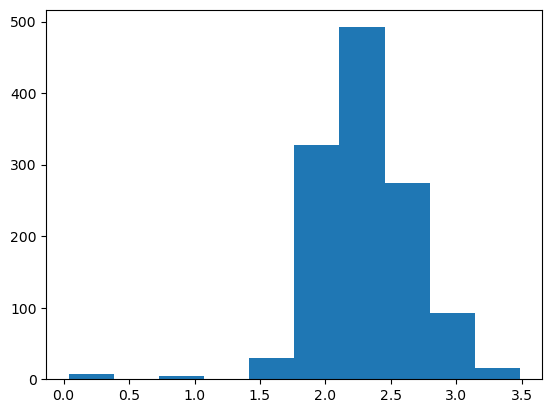

In [24]:
plt.hist([h for h in camera_heights if h is not None])

In [25]:
# Add the attribute to the GeoDataFrame
gdf_points['height_c'] = camera_heights

## Export updated metadata

In [26]:
# Save the updated GeoJSON file
# out_file=r'D:\Wagga\GSV\Final_Wagga_meta_camera_height.geojson'
out_file=r'D:\Launceston\GSV\LC_Final_meta_camera_height.geojson'
gdf_points.to_file(out_file, driver='GeoJSON')